# Harmonic mean p-value for FWER correction

In [44]:
import numpy as np
import seaborn as sns
from pathlib import Path as p
import pandas as pd 
from tqdm import tqdm
  
BIDS_root = p.home() / 'Research' / 'harmonic-mean-p'
from ieeg.io import get_data, raw_from_layout

In [45]:
layout = get_data(task='AD', root=BIDS_root)

In [46]:
input_file = p('/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/participants.tsv')
subject_info = pd.read_csv(input_file, delimiter='\t')
subject_info.head()

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
3,sub-004,F,67,A,20
4,sub-005,M,70,A,22


In [47]:
subject_info.shape

(88, 5)

In [48]:
raw_min = 10000
for ii, subject in enumerate(subject_info['participant_id']):
    subj = subject.split('-')[1]
    raw = raw_from_layout(layout.derivatives['preprocessed'], subject=subj, extension='.set', preload=False, verbose=False)
    time_length = raw.times.shape[0] / raw.info['sfreq']
    if time_length < raw_min:
        raw_min = time_length
print(raw_min)


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-001_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-001/**/eeg/sub-001*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-001_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-001/**/eeg/sub-001*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

306.1


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-087_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-087/**/eeg/sub-087*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

In [49]:
# Initialize empty lists to store power spectral densities, frequency arrays, and sample indices
psds = {}
freqs = []
samples = []

# Loop over each participant in the subject_info DataFrame
for ii, subject in tqdm(enumerate(subject_info['participant_id'])):
    sample = 0  # Initialize a sample counter for the current subject
    psds[subject] = [] # Initialize subject list to store psd arrays
    # Extract the subject identifier from the participant_id string (assumes format like 'prefix-<id>')
    subj = subject.split('-')[1]
    
    # Load the raw EEG data for this subject using a preprocessed layout
    raw = raw_from_layout(layout.derivatives['preprocessed'], subject=subj, extension='.set')
    
    # Determine the number of 2-second intervals available for PSD computation
    time_length = int(raw_min / 2) - 2
    
    # Create a generator that produces start times for each 2-second interval (0, 2, 4, ..., time_length*2)
    time_gen = (x * 2 for x in range(time_length))
    
    # Loop over each time interval
    for time in time_gen:
        # Record the current sample index
        samples.append(sample)
        sample += 1  # Increment the sample counter
        
        # Define the start and end times for the current 2-second interval
        t_min = time
        t_max = time + 2
        
        # Compute the power spectral density (PSD) for all channels using the multitaper method
        # The PSD is computed for frequencies between 0.25 and 50 Hz within the defined time window
        psd = raw.compute_psd( 
            method='multitaper', 
            fmin=0.25, 
            fmax=45, 
            tmin=t_min, 
            tmax=t_max
        )
        # Append the computed PSD to the psds list
        psds[subject].append(psd) 

0it [00:00, ?it/s]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-001_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-001/**/eeg/sub-001*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-001_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-001/**/eeg/sub-001*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

1it [00:01,  1.32s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-002_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-002/**/eeg/sub-002*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-002_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-002/**/eeg/sub-002*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

2it [00:02,  1.33s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-003_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-003/**/eeg/sub-003*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

3it [00:03,  1.31s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-004_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-004/**/eeg/sub-004*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

4it [00:05,  1.35s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-005_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-005/**/eeg/sub-005*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-005_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-005/**/eeg/sub-005*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

5it [00:06,  1.34s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-006_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-006/**/eeg/sub-006*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

6it [00:08,  1.35s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-007_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-007/**/eeg/sub-007*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

7it [00:09,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-008_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-008/**/eeg/sub-008*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

8it [00:10,  1.37s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-009_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-009/**/eeg/sub-009*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

9it [00:12,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-010_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-010/**/eeg/sub-010*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

10it [00:13,  1.41s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-011_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-011/**/eeg/sub-011*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

11it [00:15,  1.40s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-012_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-012/**/eeg/sub-012*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

12it [00:16,  1.41s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-013_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-013/**/eeg/sub-013*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

13it [00:17,  1.41s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-014_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-014/**/eeg/sub-014*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

14it [00:19,  1.43s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-015_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-015/**/eeg/sub-015*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

15it [00:20,  1.44s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-016_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-016/**/eeg/sub-016*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

16it [00:22,  1.43s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-017_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-017/**/eeg/sub-017*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

17it [00:23,  1.42s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-018_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-018/**/eeg/sub-018*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

18it [00:25,  1.42s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-019_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-019/**/eeg/sub-019*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

19it [00:26,  1.57s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-020_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-020/**/eeg/sub-020*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-020_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-020/**/eeg/sub-020*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

20it [00:28,  1.49s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-021_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-021/**/eeg/sub-021*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

21it [00:29,  1.45s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-022_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-022/**/eeg/sub-022*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

22it [00:31,  1.43s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-023_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-023/**/eeg/sub-023*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

23it [00:32,  1.42s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-024_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-024/**/eeg/sub-024*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

24it [00:33,  1.42s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-025_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-025/**/eeg/sub-025*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

25it [00:35,  1.39s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-026_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-026/**/eeg/sub-026*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

26it [00:36,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-027_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-027/**/eeg/sub-027*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

27it [00:37,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-028_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-028/**/eeg/sub-028*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

28it [00:39,  1.39s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-029_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-029/**/eeg/sub-029*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

29it [00:40,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-030_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-030/**/eeg/sub-030*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

30it [00:41,  1.35s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-031_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-031/**/eeg/sub-031*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

31it [00:43,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-032_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-032/**/eeg/sub-032*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

32it [00:44,  1.37s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-033_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-033/**/eeg/sub-033*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

33it [00:46,  1.35s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-034_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-034/**/eeg/sub-034*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

34it [00:47,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-035_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-035/**/eeg/sub-035*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

35it [00:48,  1.40s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-036_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-036/**/eeg/sub-036*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

36it [00:50,  1.39s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-037_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-037/**/eeg/sub-037*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-037_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-037/**/eeg/sub-037*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

37it [00:51,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-038_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-038/**/eeg/sub-038*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

38it [00:52,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-039_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-039/**/eeg/sub-039*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

39it [00:54,  1.37s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-040_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-040/**/eeg/sub-040*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

40it [00:55,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-041_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-041/**/eeg/sub-041*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

41it [00:57,  1.43s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-042_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-042/**/eeg/sub-042*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

42it [00:58,  1.42s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-043_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-043/**/eeg/sub-043*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-043_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-043/**/eeg/sub-043*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

43it [00:59,  1.37s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-044_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-044/**/eeg/sub-044*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-044_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-044/**/eeg/sub-044*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

44it [01:01,  1.37s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-045_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-045/**/eeg/sub-045*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

45it [01:02,  1.39s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-046_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-046/**/eeg/sub-046*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

46it [01:04,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-047_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-047/**/eeg/sub-047*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

47it [01:05,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-048_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-048/**/eeg/sub-048*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

48it [01:06,  1.39s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-049_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-049/**/eeg/sub-049*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

49it [01:08,  1.39s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-050_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-050/**/eeg/sub-050*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

50it [01:09,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-051_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-051/**/eeg/sub-051*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

51it [01:10,  1.37s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-052_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-052/**/eeg/sub-052*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

52it [01:12,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-053_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-053/**/eeg/sub-053*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

53it [01:13,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-054_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-054/**/eeg/sub-054*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

54it [01:15,  1.37s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-055_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-055/**/eeg/sub-055*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

55it [01:16,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-056_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-056/**/eeg/sub-056*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

56it [01:17,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-057_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-057/**/eeg/sub-057*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-057_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-057/**/eeg/sub-057*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

57it [01:19,  1.34s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-058_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-058/**/eeg/sub-058*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

58it [01:20,  1.34s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-059_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-059/**/eeg/sub-059*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

59it [01:21,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-060_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-060/**/eeg/sub-060*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

60it [01:23,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-061_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-061/**/eeg/sub-061*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

61it [01:24,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-062_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-062/**/eeg/sub-062*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

62it [01:25,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-063_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-063/**/eeg/sub-063*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

63it [01:27,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-064_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-064/**/eeg/sub-064*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

64it [01:28,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-065_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-065/**/eeg/sub-065*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-065_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-065/**/eeg/sub-065*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

65it [01:29,  1.34s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-066_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-066/**/eeg/sub-066*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

66it [01:31,  1.33s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-067_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-067/**/eeg/sub-067*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-067_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-067/**/eeg/sub-067*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

67it [01:32,  1.39s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-068_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-068/**/eeg/sub-068*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

68it [01:34,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-069_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-069/**/eeg/sub-069*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

69it [01:35,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-070_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-070/**/eeg/sub-070*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-070_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-070/**/eeg/sub-070*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

70it [01:36,  1.33s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-071_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-071/**/eeg/sub-071*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

71it [01:38,  1.33s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-072_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-072/**/eeg/sub-072*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

72it [01:39,  1.34s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-073_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-073/**/eeg/sub-073*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

73it [01:40,  1.35s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-074_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-074/**/eeg/sub-074*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

74it [01:42,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-075_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-075/**/eeg/sub-075*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

75it [01:43,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-076_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-076/**/eeg/sub-076*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-076_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-076/**/eeg/sub-076*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

76it [01:44,  1.36s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-077_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-077/**/eeg/sub-077*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

77it [01:46,  1.35s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-078_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-078/**/eeg/sub-078*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

78it [01:47,  1.38s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-079_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-079/**/eeg/sub-079*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

79it [01:49,  1.37s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-080_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-080/**/eeg/sub-080*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

80it [01:50,  1.39s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-081_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-081/**/eeg/sub-081*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

81it [01:51,  1.39s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-082_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-082/**/eeg/sub-082*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-082_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-082/**/eeg/sub-082*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

82it [01:53,  1.37s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-083_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-083/**/eeg/sub-083*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-083_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-083/**/eeg/sub-083*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

83it [01:54,  1.35s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-084_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-084/**/eeg/sub-084*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any channels.tsv associated with sub-084_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-084/**/eeg/sub-084*channels.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verb

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

84it [01:55,  1.33s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-085_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-085/**/eeg/sub-085*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

85it [01:57,  1.33s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-086_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-086/**/eeg/sub-086*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

86it [01:58,  1.33s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-087_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-087/**/eeg/sub-087*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

87it [01:59,  1.33s/it]

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: RuntimeWarning: Did not find any events.tsv associated with sub-088_task-eyesclosed.

The search_str was "/Users/dsexton/Research/harmonic-mean-p/BIDS-1.0_AD/BIDS/derivatives/preprocessed/sub-088/**/eeg/sub-088*events.tsv"
  whole_raw = read_raw_bids(bids_path=BIDS_path, verbose=verbose)
/opt/anaconda3/envs/ieeg_pipe/lib/python3.12/site-packages/ieeg/io.py:118: Ru

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

88it [02:01,  1.38s/it]


In [50]:
len(psds['sub-001'])

151

In [51]:
len([psds[subj][0][1] for subj in psds.keys()])

88

In [52]:
chans = psds['sub-001'][0].ch_names
ch_series = []
for ii in range(len(psds['sub-001'])):
    for jj, ch in enumerate(chans):
        ch_series.append(pd.Series([psds[subj][ii][jj].flatten() for subj in psds.keys()], name=ch))


In [53]:
ch_df = pd.DataFrame(ch_series)
ch_df = ch_df.reset_index(names='Channel')
ch_df = pd.melt(ch_df, id_vars='Channel', ignore_index=True, value_name='PSD', var_name='Subject')
ch_df = ch_df.explode('PSD')

In [54]:
ch_df.shape

(22722480, 3)

In [55]:
ch_df = ch_df.reset_index(drop=True)

In [56]:
num_ch = len(raw.ch_names)
num_subj = subject_info.shape[0]
num_samples = len(psds['sub-001'])
num_freqs = len(psds['sub-001'][0].freqs)

In [57]:
group_series = pd.Series(list())

In [58]:
freqs_series = pd.Series(list(psds['sub-001'][0].freqs) * num_ch * num_subj * num_samples)
freqs_series = freqs_series.astype(float).round(1)

In [59]:
sample_series = pd.Series([[ii+1] * num_ch  * num_freqs for ii in range(num_samples)]).explode(ignore_index=True)

In [60]:
sample_series = pd.Series(list(sample_series) * num_subj)

In [61]:
final_df = ch_df

In [62]:
final_df.shape

(22722480, 3)

In [63]:
final_df['Sample'] = sample_series
final_df['Freq'] = freqs_series
final_df['Group'] = final_df['Subject'].map(subject_info['Group'])

In [64]:
final_df

,Channel,Subject,PSD,Sample,Freq,Group
0,Fp1,0,0.0,1,0.5,A
1,Fp1,0,0.0,1,1.0,A
2,Fp1,0,0.0,1,1.5,A
3,Fp1,0,0.0,1,2.0,A
4,Fp1,0,0.0,1,2.5,A
...,...,...,...,...,...,...
22722475,Pz,87,0.0,151,43.0,F
22722476,Pz,87,0.0,151,43.5,F
22722477,Pz,87,0.0,151,44.0,F
22722478,Pz,87,0.0,151,44.5,F


## Do permutation test for significance

Define necessary functions:
- Mean difference statistic for permutation test
- Landau density to calculate hmp
- Corrected mean p value calculation

In [66]:
from scipy.stats import false_discovery_control, hmean, permutation_test

from scipy import integrate

def mean_diff(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

def _landau_density(x, mu, sigma):
    """
    Copied from: github.com/benjaminpatrickevans/harmonicmeanp

    Computes the density of the Landau distribution. Note: This could be improved for efficiency,
    for example, using pylandau. Here I have used a naive implementation to keep dependencies small.
    """
    fn = lambda t:  np.exp(-t * ((x-mu)/sigma) - (2/np.pi) * t * np.log(t)) * np.sin(2 * t)
    return 1 / (mu * sigma) * integrate.quad(fn, 0, np.inf, limit=1000)[0]


def get_corrected_hmpval(hmpval, L, w_r=1.0):
    """
    Get the corrected harmonic mean p value.
    
    hmpval: harmonic mean p-value
    L: total number of tests
    w_r: sum of weights for the tests performed
    """
    mu = np.log(L) + 0.874
    sigma = np.pi / 2
    landau = lambda x: _landau_density(x, mu, sigma)
    res = integrate.quad(
        landau,
        w_r / hmpval,
        np.inf,
        limit=10000,
        epsabs=1e-6,
    )[0]
    return res

### Calculate p-values across a range of frequency bins 

In [67]:
new_df = final_df.copy()
freq_resolution = 0.5 
bins = np.arange(0, new_df['Freq'].max() + freq_resolution, freq_resolution)
new_df['Frequency Bins'] = pd.cut(new_df['Freq'],
                                bins=bins, labels=None, right=False)

In [70]:
grouped_df = new_df.groupby(['Subject', 'Freq', 'Channel', 'Group'], 
                    observed=False)['PSD'].mean().reset_index() 

In [71]:
grouped_df['Group'].unique()

array(['A', 'C', 'F'], dtype=object)

In [72]:
grouped_df

,Subject,Freq,Channel,Group,PSD
0,0,0.5,C3,A,0.0
1,0,0.5,C4,A,0.0
2,0,0.5,Cz,A,0.0
3,0,0.5,F3,A,0.0
4,0,0.5,F4,A,0.0
...,...,...,...,...,...
150475,87,45.0,Pz,F,0.0
150476,87,45.0,T3,F,0.0
150477,87,45.0,T4,F,0.0
150478,87,45.0,T5,F,0.0


In [73]:
# Group by 'Channel' and 'Frequency'
grouped = grouped_df.groupby(['Channel', 'Freq'])

# Store results
p_values = []

# Iterate through each (Channel, Frequency) group
for (channel, freq), group in grouped:
    # Get PSD values per subject
    psd_by_subject = group.pivot(index='Subject', columns=['Channel', 'Freq'], values='PSD')
    # Split into two groups 

    group_A = psd_by_subject.loc[grouped_df[grouped_df['Group'] == 'A']['Subject'].unique()].dropna()
    group_C = psd_by_subject.loc[grouped_df[grouped_df['Group'] == 'C']['Subject'].unique()].dropna()
    # Run permutation test
    res = permutation_test((group_A.values, group_C.values), lambda a, b, axis: np.mean(a, axis=axis) - np.mean(b, axis=axis), 
                           vectorized=True, axis=0, n_resamples=10000)

    # Store results
    p_values.append({'Channel': channel, 'Frequency': freq, 'p_value': res.pvalue})

# Convert results to DataFrame
pval_df = pd.DataFrame(p_values)

In [74]:
pval_df

,Channel,Frequency,p_value
0,C3,0.5,[0.8979102089791021]
1,C3,1.0,[0.9377062293770623]
2,C3,1.5,[0.928907109289071]
3,C3,2.0,[0.9493050694930507]
4,C3,2.5,[0.9167083291670833]
...,...,...,...
1705,T6,43.0,[0.11398860113988601]
1706,T6,43.5,[0.1277872212778722]
1707,T6,44.0,[0.11138886111388861]
1708,T6,44.5,[0.128987101289871]


In [75]:
pval_df['P value'] = pval_df['p_value'].astype(float)

<Axes: xlabel='Channel', ylabel='P value'>

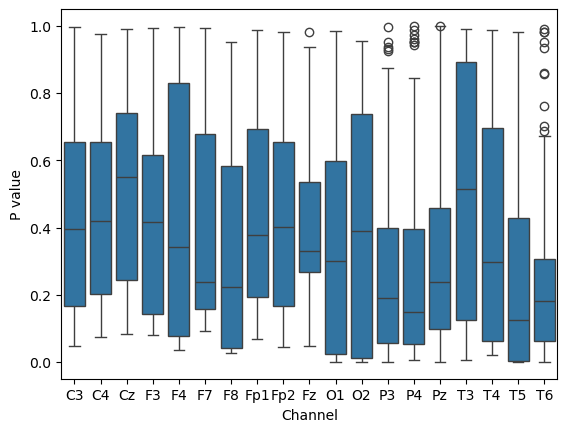

In [76]:
sns.boxplot(data=pval_df, x='Channel', y='P value')

In [77]:
test_hmp = get_corrected_hmpval(hmean(pval_df['P value']), len(pval_df['P value']))

In [78]:
test_hmp

0.003199115637238136

In [79]:
mean_p_val = np.mean(pval_df['P value'])
print(mean_p_val)

0.3843696332121174


In [80]:
bh_corrected = np.mean(false_discovery_control(pval_df['P value'], axis=0, method='bh'))
print(bh_corrected)

0.6161666197875653
